In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
df_gscore = pd.read_csv('data/genome-scores.csv')
#df_gtags = pd.read_csv('data/genome-tags.csv')
#df_links = pd.read_csv('data/links.csv')
df_movies = pd.read_csv('data/movies.csv')
df_rating = pd.read_csv('data/ratings.csv')
#df_tagspd = pd.read_csv('data/tags.csv')

In [17]:
df_gscore.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   movieId    11709768 non-null  int64  
 1   tagId      11709768 non-null  int64  
 2   relevance  11709768 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [5]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [2]:
df_rating = pd.read_csv('data/ratings.csv')
df_gscore = pd.read_csv('data/genome-scores.csv')
movie_ids_in_gscore = df_gscore['movieId'].unique()
df_rating_filtered = df_rating[df_rating['movieId'].isin(movie_ids_in_gscore)]
df_rating_filtered = df_rating_filtered.drop(['userId','timestamp'], axis =1).groupby(['movieId']).count()
df_rating_filtered

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
130578,5
130840,3
131013,5


In [30]:
df_rating_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10370 entries, 1 to 131170
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  10370 non-null  int64
dtypes: int64(1)
memory usage: 162.0 KB


C:\Users\HamidEsfahlani\AppData\Local\Temp\ipykernel_26224\3366055890.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


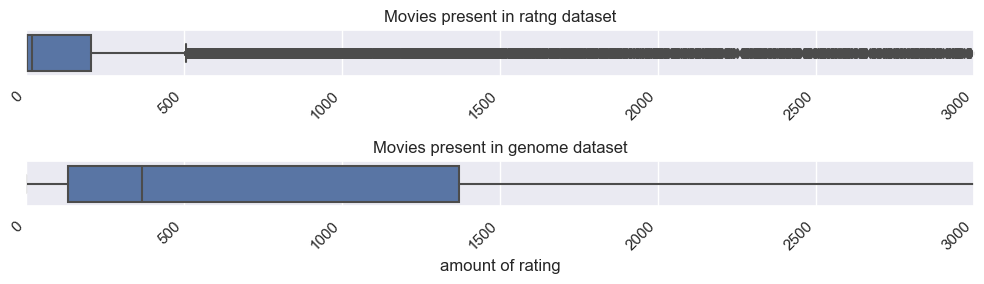

In [49]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 3))

# Box plot for df_rating_filtered['rating']
sns.boxplot(data=df_rating_filtered, x='rating', ax=axes[1])
axes[1].set_title('Movies present in genome dataset')

axes[1].set_xlim(0, 3000)  # Adjust the limits as needed
axes[1].set_xlabel('amount of rating') 
# Box plot for df_rating['movieId'].value_counts()
sns.boxplot(x=df_rating['movieId'].value_counts(), ax=axes[0])
axes[0].set_title('Movies present in ratng dataset')

axes[0].set_xlim(0, 3000)  # Adjust the limits as needed
axes[0].set_xlabel('')

# Rotate x-labels for better visibility
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [2]:
from model.ContentBasedRec import recommendation


given_movies = [['Akira', '1988'], ['Network', '1976'], ['Prisoners', '2013'], ['Incendies', '2010'],
                ['red shoes', '1948'], ['metropolis', '1927']]

recommendation(given_movies, 20, 18)


c:\Users\HamidEsfahlani\Documents\GitHub\movie_recommendation_ProjectCDS\data_script\Preprocess_Content_Based.py:49: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(df_movies.genres.apply(pd.Series).stack()).sum(level=0)
c:\Users\HamidEsfahlani\anaconda3\envs\MovieRecommend\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,labels,title,genres,score
movieId,,,,
2959,14,Fight Club (1999),Action|Crime|Drama|Thriller,0.809802
4226,14,Memento (2000),Mystery|Thriller,0.802606
6016,14,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,0.797432
318,5,"Shawshank Redemption, The (1994)",Crime|Drama,0.796604
27773,14,Old Boy (2003),Mystery|Thriller,0.795385
50,14,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.793698
4878,14,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,0.790552
25911,14,"Woman in the Window, The (1944)",Crime|Film-Noir|Thriller,0.789195
2329,5,American History X (1998),Crime|Drama,0.788693


In [2]:
import pandas as pd
sviatlana_rating = pd.read_csv('data/Sviatlana_ratings.csv')
sviatlana_rating
from model.ContentBasedRec import recommendation
recommendation(sviatlana_rating['movie_id'].tolist() , 20, 18)

c:\Users\HamidEsfahlani\Documents\GitHub\movie_recommendation_ProjectCDS\data_script\Preprocess_Content_Based.py:46: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(df_movies.genres.apply(pd.Series).stack()).sum(level=0)
c:\Users\HamidEsfahlani\anaconda3\envs\MovieRecommend\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,labels,title,genres,score
movieId,,,,
27773,13,Old Boy (2003),Mystery|Thriller,0.873332
2692,0,Run Lola Run (Lola rennt) (1998),Action|Crime,0.873106
38095,3,"Bittersweet Life, A (Dalkomhan insaeng) (2005)",Action|Crime|Drama,0.870386
2858,4,American Beauty (1999),Comedy|Drama,0.869976
40697,0,Babylon 5,Sci-Fi,0.864237
7981,13,Infernal Affairs (Mou gaan dou) (2002),Crime|Drama|Thriller,0.861780
94466,13,Black Mirror (2011),Drama|Sci-Fi,0.860849
112582,4,Life Itself (2014),Documentary,0.860686
48780,0,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller,0.856843


In [10]:
import pandas as pd
hamid_rating = pd.read_csv('data/Hamid-ratings.csv')
from model.ContentBasedRec_02 import recommendation
recommendation(hamid_rating['movie_id'].tolist() , 20, 18)

c:\Users\HamidEsfahlani\Documents\GitHub\movie_recommendation_ProjectCDS\data_script\Preprocess_Content_Based.py:46: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(df_movies.genres.apply(pd.Series).stack()).sum(level=0)


,labels,title,genres
movieId,,,
55232,3,Resident Evil: Extinction (2007),Action|Horror|Sci-Fi|Thriller
8808,10,"Princess Diaries 2: Royal Engagement, The (2004)",Comedy|Romance
74154,10,When in Rome (2010),Comedy|Romance
54734,10,Sydney White (2007),Comedy
53464,3,Fantastic Four: Rise of the Silver Surfer (2007),Action|Adventure|Sci-Fi
8869,10,First Daughter (2004),Comedy|Romance
8911,10,Raise Your Voice (2004),Romance
94018,3,Battleship (2012),Action|Sci-Fi|Thriller|IMAX
3687,1,Light Years (Gandahar) (1988),Adventure|Animation|Fantasy|Sci-Fi


In [3]:
#from model.HybridRecommendationSystem import hybrid_recommendation
sviatlana_rating = pd.read_csv('data/Sviatlana_ratings.csv')
sviatlana_rating
#hybrid_recommendation(,sviatlana_rating['movie_id'].tolist() )

,movie_id,imdb_id,tmdb_id,rating,average_rating,title
0,50,114814,629,5.0,4.26568,The Usual Suspects (1995)
1,111,75314,103,5.0,4.08056,Taxi Driver (1976)
2,293,110413,101,4.5,4.09683,Léon: The Professional (1994)
3,296,110912,680,5.0,4.19163,Pulp Fiction (1994)
4,307,108394,108,4.0,3.96434,Three Colors: Blue (1993)
...,...,...,...,...,...,...
121,201646,8772262,530385,4.5,3.79511,Midsommar (2019)
122,202439,6751668,496243,5.0,4.33089,Parasite (2019)
123,277066,7322224,497828,5.0,3.69317,Triangle of Sadness (2022)
124,278578,1016150,49046,5.0,3.81387,All Quiet on the Western Front (2022)
